In [38]:
# Tokenize and Lowercase

from nltk.tokenize import word_tokenize
import os

def tokenize_and_lowercase(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text using word_tokenize from nltk
    tokens = word_tokenize(text)

    # Lowercase the tokens
    tokens_lowercased = [token.lower() for token in tokens]

    # Join the tokens into a string
    result_text = ' '.join(tokens_lowercased)

    # Save the result to the output file
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(result_text)

# Input and output directories
input_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_0_Clean_Text\\"
output_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_1_Tokenized_Lowercased\\"

# File paths
machine_translated_input_file = os.path.join(input_dir, "Frogs_Machine_Translated_Cleaned.txt")
human_translated_input_file = os.path.join(input_dir, "Frogs_Human_Translated_Cleaned.txt")

machine_translated_output_file = os.path.join(output_dir, "Frogs_Machine_Tokenized.txt")
human_translated_output_file = os.path.join(output_dir, "Frogs_Human_Tokenized.txt")

# Tokenize and lowercase machine translated text
tokenize_and_lowercase(machine_translated_input_file, machine_translated_output_file)

# Tokenize and lowercase human translated text
tokenize_and_lowercase(human_translated_input_file, human_translated_output_file)


In [39]:
# Remove Stopwords and Punctuation

import os
import string
import re
from nltk.corpus import stopwords

def remove_non_english_and_single_double_letters(input_text):
    # Remove non-English letters
    english_only = re.sub(r'[^a-zA-Z\s]', '', input_text)
    
    # Remove single and double letters
    without_single_double = re.sub(r'\b\w{1,2}\b', '', english_only)
    
    return without_single_double

def remove_stopwords_and_punctuation(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into words
    words = text.split()

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    
    # Additional characters to remove
    additional_characters = ['``', "'", "'ve'", '–', "'", '.', '‘', '’', '--', "'s'", '.', '-', "''"]
    
    words_filtered = [word for word in words if word not in stop_words and word not in string.punctuation and word not in additional_characters]

    # Join the filtered words into a string
    result_text = ' '.join(words_filtered)
    
    # Remove non-English letters and single/double letters
    result_text = remove_non_english_and_single_double_letters(result_text)

    # Save the result to the output file
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(result_text)

# Input and output directories
input_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_1_Tokenized_Lowercased\\"
output_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_2_Remove_Stopwords_Punctuation\\"

# File paths
machine_tokenized_input_file = os.path.join(input_dir, "Frogs_Machine_Tokenized.txt")
human_tokenized_input_file = os.path.join(input_dir, "Frogs_Human_Tokenized.txt")

machine_tokenized_output_file = os.path.join(output_dir, "Frogs_Machine_Tokenized_Removed.txt")
human_tokenized_output_file = os.path.join(output_dir, "Frogs_Human_Tokenized_Removed.txt")

# Remove stopwords and punctuation from machine tokenized text
remove_stopwords_and_punctuation(machine_tokenized_input_file, machine_tokenized_output_file)

# Remove stopwords and punctuation from human tokenized text
remove_stopwords_and_punctuation(human_tokenized_input_file, human_tokenized_output_file)


In [40]:
# Lemmatization

from nltk.stem import WordNetLemmatizer, PorterStemmer
import os

def lemmatize_and_stem(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into words
    words = text.split()

    # Initialize lemmatizer and stemmer
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    # Lemmatize and stem each word
    lemmatized_and_stemmed_words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words]

    # Join the lemmatized and stemmed words into a string
    result_text = ' '.join(lemmatized_and_stemmed_words)

    # Save the result to the output file
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(result_text)

# Input and output directories
input_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_2_Remove_Stopwords_Punctuation\\"
output_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_3_Lemmatization\\"

# File paths
machine_removed_input_file = os.path.join(input_dir, "Frogs_Machine_Tokenized_Removed.txt")
human_removed_input_file = os.path.join(input_dir, "Frogs_Human_Tokenized_Removed.txt")

machine_lemmatized_stemmed_output_file = os.path.join(output_dir, "Frogs_Machine_Tokenized_Stemmed.txt")
human_lemmatized_stemmed_output_file = os.path.join(output_dir, "Frogs_Human_Tokenized_Stemmed.txt")

# Lemmatize and stem machine tokenized text
lemmatize_and_stem(machine_removed_input_file, machine_lemmatized_stemmed_output_file)

# Lemmatize and stem human tokenized text
lemmatize_and_stem(human_removed_input_file, human_lemmatized_stemmed_output_file)


In [41]:
# Word Frequency before Lemmatization

import nltk
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download('punkt')

def calculate_word_frequency(input_file, output_csv):
    # Read the text from the input file
    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Calculate word frequency
    frequency_dist = FreqDist(words)

    # Convert the frequency distribution to a DataFrame
    frequency_df = pd.DataFrame(list(frequency_dist.items()), columns=["Word", "Frequency"])

    # Sort the DataFrame by frequency in descending order
    frequency_df = frequency_df.sort_values(by="Frequency", ascending=False)

    # Save the DataFrame to a CSV file
    frequency_df.to_csv(output_csv, index=False)

# Input and output directories
input_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_2_Remove_Stopwords_Punctuation\\"
output_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_4_Word_Frequency_CSV\\"

# File paths
machine_input_file = os.path.join(input_dir, "Frogs_Machine_Tokenized_Removed.txt")
human_input_file = os.path.join(input_dir, "Frogs_Human_Tokenized_Removed.txt")

machine_output_csv = os.path.join(output_dir, "Frogs_Machine_Word_Frequency.csv")
human_output_csv = os.path.join(output_dir, "Frogs_Human_Word_Frequency.csv")

# Calculate word frequency and save the result to CSV
calculate_word_frequency(machine_input_file, machine_output_csv)
calculate_word_frequency(human_input_file, human_output_csv)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
# Word Frequency After Lemmatization

import nltk
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download('punkt')

def calculate_word_frequency(input_file, output_csv):
    # Read the text from the input file
    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Calculate word frequency
    frequency_dist = FreqDist(words)

    # Convert the frequency distribution to a DataFrame
    frequency_df = pd.DataFrame(list(frequency_dist.items()), columns=["Word", "Frequency"])

    # Sort the DataFrame by frequency in descending order
    frequency_df = frequency_df.sort_values(by="Frequency", ascending=False)

    # Save the DataFrame to a CSV file
    frequency_df.to_csv(output_csv, index=False)

# Input and output directories
input_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_3_Lemmatization\\"
output_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_4_Word_Frequency_CSV\\"

# File paths
machine_input_file = os.path.join(input_dir, "Frogs_Machine_Tokenized_Stemmed.txt")
human_input_file = os.path.join(input_dir, "Frogs_Human_Tokenized_Stemmed.txt")

machine_output_csv = os.path.join(output_dir, "Frogs_Machine_Word_Frequency_Lemmatized.csv")
human_output_csv = os.path.join(output_dir, "Frogs_Human_Word_Frequency_Lemmatized.csv")

# Calculate word frequency and save the result to CSV
calculate_word_frequency(machine_input_file, machine_output_csv)
calculate_word_frequency(human_input_file, human_output_csv)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
# Sentence Length Frequency

import pandas as pd
import os

def calculate_sentence_length_frequency(input_text, output_csv):
    with open(input_text, 'r', encoding='utf-8') as file:
        text = file.read()

    # Split the text into sentences using full stop punctuations
    sentences = [sentence.strip() for sentence in re.split(r'[.!?]', text) if sentence.strip()]

    # Calculate the length of each sentence
    sentence_lengths = [len(sentence.split()) for sentence in sentences]

    # Create a DataFrame with sentence lengths
    length_df = pd.DataFrame({'Sentence Length': sentence_lengths})

    # Save the DataFrame to a CSV file
    length_df.to_csv(output_csv, index=False)

# Input directory
input_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_0_Clean_Text\\"

# Output directory
output_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_5_Sentence_Length_Frequency\\"

# File paths
human_input_text = os.path.join(input_dir, "Frogs_Human_Translated_Cleaned.txt")
machine_input_text = os.path.join(input_dir, "Frogs_Machine_Translated_Cleaned.txt")

human_output_csv = os.path.join(output_dir, "Frogs_Human_Sentence_Length.csv")
machine_output_csv = os.path.join(output_dir, "Frogs_Machine_Sentence_Length.csv")

# Calculate and save sentence length frequency for human-generated text
calculate_sentence_length_frequency(human_input_text, human_output_csv)

# Calculate and save sentence length frequency for machine-generated text
calculate_sentence_length_frequency(machine_input_text, machine_output_csv)


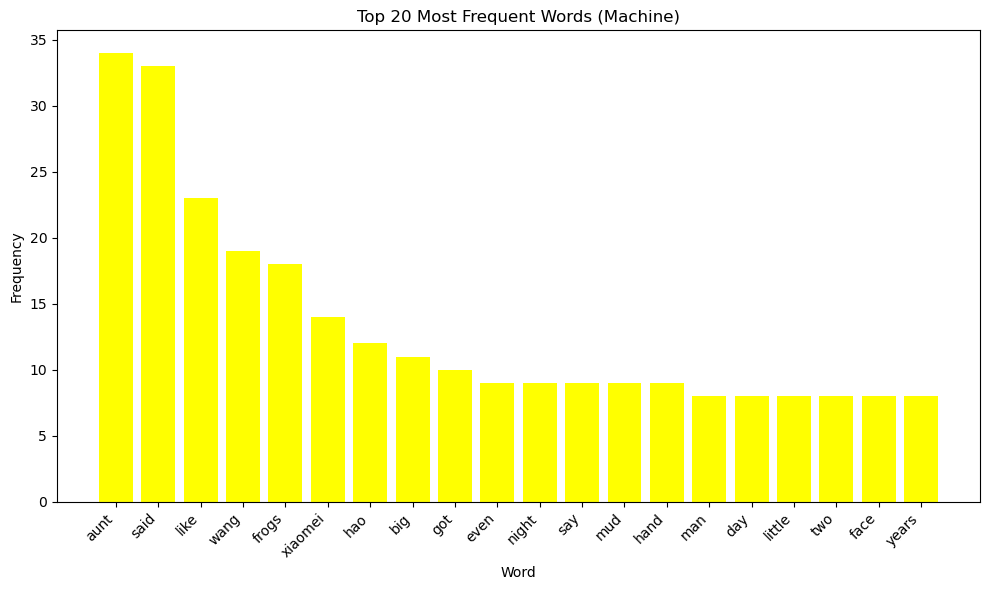

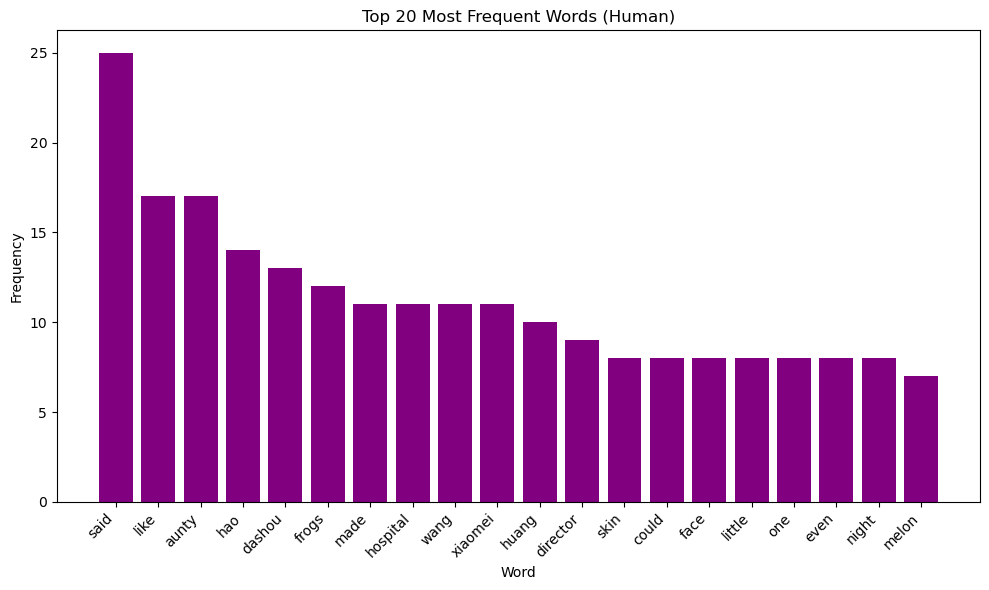

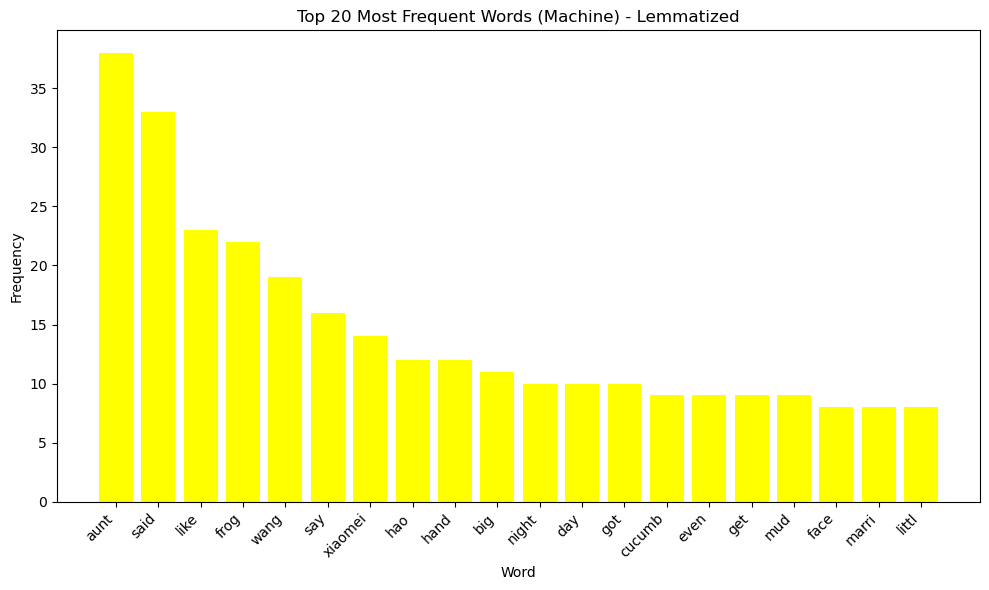

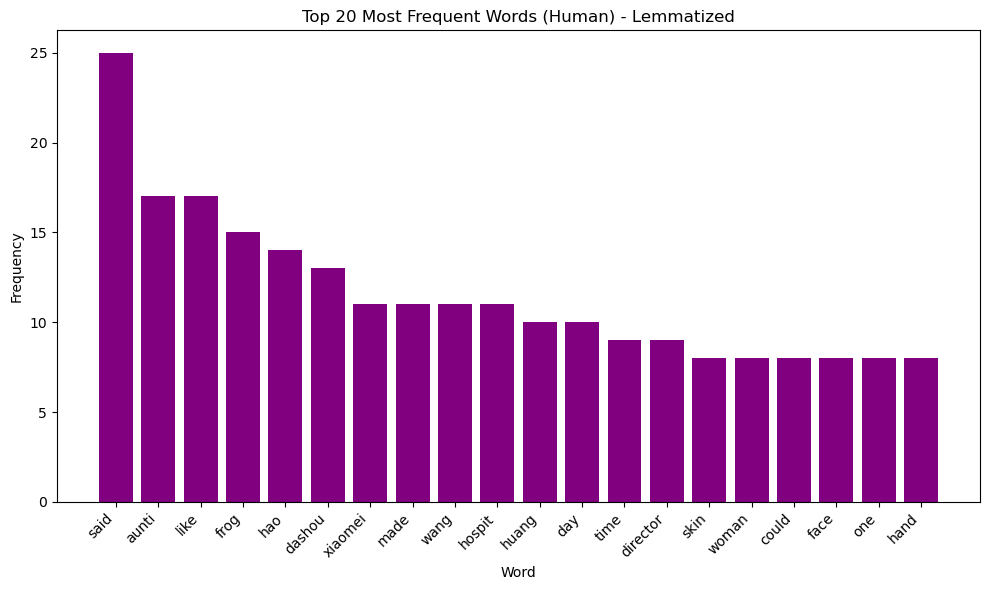

In [44]:
# Visualization: 

import pandas as pd
import matplotlib.pyplot as plt
import os

# Visualization function
def visualize_word_frequency(input_csv, plot_title, bar_color='blue'):
    # Read the CSV file into a DataFrame
    frequency_df = pd.read_csv(input_csv)

    # Select the top 20 most frequent words
    top_words = frequency_df.head(20)

    # Plot the word frequency distribution
    plt.figure(figsize=(10, 6))
    plt.bar(top_words['Word'], top_words['Frequency'], color=bar_color)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(plot_title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Input directory
input_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_4_Word_Frequency_CSV\\"

# File paths
machine_input_csv = os.path.join(input_dir, "Frogs_Machine_Word_Frequency.csv")
human_input_csv = os.path.join(input_dir, "Frogs_Human_Word_Frequency.csv")
machine_input_csv_lemmatized = os.path.join(input_dir, "Frogs_Machine_Word_Frequency_Lemmatized.csv")
human_input_csv_lemmatized = os.path.join(input_dir, "Frogs_Human_Word_Frequency_Lemmatized.csv")

# Visualize word frequency for machine-generated text with different color (e.g., green)
visualize_word_frequency(machine_input_csv, "Top 20 Most Frequent Words (Machine)", bar_color='yellow')

# Visualize word frequency for human-generated text with different color (e.g., red)
visualize_word_frequency(human_input_csv, "Top 20 Most Frequent Words (Human)", bar_color='purple')

# Visualize word frequency for machine-generated text after lemmatization with different color (e.g., orange)
visualize_word_frequency(machine_input_csv_lemmatized, "Top 20 Most Frequent Words (Machine) - Lemmatized", bar_color='yellow')

# Visualize word frequency for human-generated text after lemmatization with different color (e.g., purple)
visualize_word_frequency(human_input_csv_lemmatized, "Top 20 Most Frequent Words (Human) - Lemmatized", bar_color='purple')


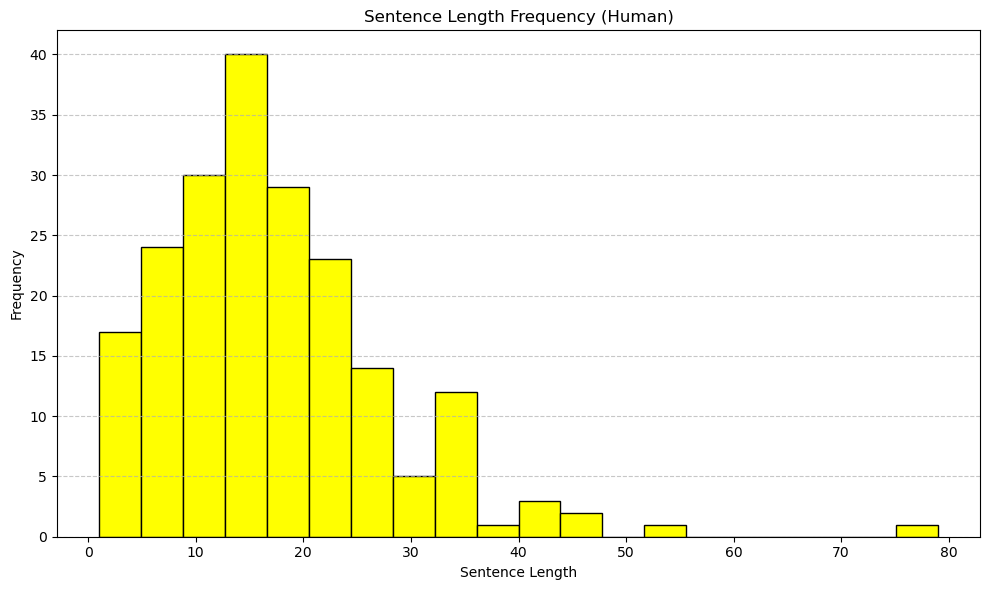

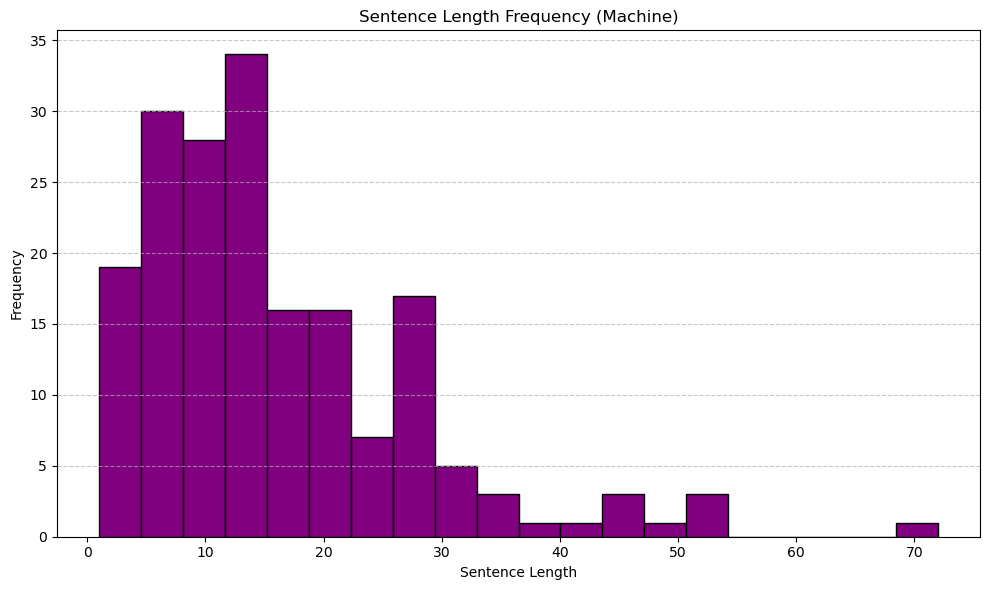

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def visualize_sentence_length_frequency(input_csv, plot_title, bar_color='blue'):
    # Read the CSV file into a DataFrame
    length_df = pd.read_csv(input_csv)

    # Plot the sentence length frequency distribution
    plt.figure(figsize=(10, 6))
    plt.hist(length_df['Sentence Length'], bins=20, color=bar_color, edgecolor='black')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.title(plot_title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Input directory
input_dir = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_5_Sentence_Length_Frequency\\"

# File paths
human_input_csv = os.path.join(input_dir, "Frogs_Human_Sentence_Length.csv")
machine_input_csv = os.path.join(input_dir, "Frogs_Machine_Sentence_Length.csv")

# Visualize sentence length frequency for human-generated text with different color (e.g., green)
visualize_sentence_length_frequency(human_input_csv, "Sentence Length Frequency (Human)", bar_color='yellow')

# Visualize sentence length frequency for machine-generated text with different color (e.g., red)
visualize_sentence_length_frequency(machine_input_csv, "Sentence Length Frequency (Machine)", bar_color='purple')


In [46]:
# KLd Divergence on Cleaned Texts

import nltk
import pandas as pd
import numpy as np
from scipy.stats import entropy
import os

# Function to compute KL Divergence with add-one smoothing
def kl_divergence_smoothed(p, q, epsilon=1e-5):
    # Apply add-one smoothing
    p_smoothed = (p + epsilon) / np.sum(p + epsilon)
    q_smoothed = (q + epsilon) / np.sum(q + epsilon)

    # KL Divergence calculation
    return entropy(p_smoothed, q_smoothed)

def compute_kl_divergence(text1, text2):
    # Tokenize the texts
    tokens1 = nltk.word_tokenize(text1)
    tokens2 = nltk.word_tokenize(text2)

    # Compute word frequencies
    freq_dist1 = FreqDist(tokens1)
    freq_dist2 = FreqDist(tokens2)

    # Combine unique words from both texts
    all_words = set(freq_dist1.keys()) | set(freq_dist2.keys())

    # Calculate probabilities for each text
    prob_dist1 = np.array([freq_dist1[word] / len(tokens1) for word in all_words])
    prob_dist2 = np.array([freq_dist2[word] / len(tokens2) for word in all_words])

    # Handle zero probabilities by smoothing
    prob_dist1_smoothed = (prob_dist1 + 1e-10) / np.sum(prob_dist1 + 1e-10)
    prob_dist2_smoothed = (prob_dist2 + 1e-10) / np.sum(prob_dist2 + 1e-10)

    # Compute KL divergence
    kl_div = kl_divergence_smoothed(prob_dist1_smoothed, prob_dist2_smoothed)

    return kl_div

# Paths to the text files
human_text_path = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_0_Clean_Text\\Frogs_Human_Translated_Cleaned.txt"
machine_text_path = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_0_Clean_Text\\Frogs_Machine_Translated_Cleaned.txt"

# Read the texts
with open(human_text_path, 'r', encoding='utf-8') as file:
    human_text = file.read()

with open(machine_text_path, 'r', encoding='utf-8') as file:
    machine_text = file.read()

# Compute KL divergence
kl_divergence_score = compute_kl_divergence(human_text, machine_text)

print(f"KL Divergence Score: {kl_divergence_score}")

KL Divergence Score: 1.3387121555478139


In [47]:
# Calculate KL Divergence on Highly Processed Text

import nltk
import pandas as pd
import numpy as np
from scipy.stats import entropy
import os

# Function to compute KL Divergence with add-one smoothing
def kl_divergence_smoothed(p, q, epsilon=1e-5):
    # Apply add-one smoothing
    p_smoothed = (p + epsilon) / np.sum(p + epsilon)
    q_smoothed = (q + epsilon) / np.sum(q + epsilon)

    # KL Divergence calculation
    return entropy(p_smoothed, q_smoothed)

def compute_kl_divergence(text1, text2):
    # Tokenize the texts
    tokens1 = nltk.word_tokenize(text1)
    tokens2 = nltk.word_tokenize(text2)

    # Compute word frequencies
    freq_dist1 = FreqDist(tokens1)
    freq_dist2 = FreqDist(tokens2)

    # Combine unique words from both texts
    all_words = set(freq_dist1.keys()) | set(freq_dist2.keys())

    # Calculate probabilities for each text
    prob_dist1 = np.array([freq_dist1[word] / len(tokens1) for word in all_words])
    prob_dist2 = np.array([freq_dist2[word] / len(tokens2) for word in all_words])

    # Handle zero probabilities by smoothing
    prob_dist1_smoothed = (prob_dist1 + 1e-10) / np.sum(prob_dist1 + 1e-10)
    prob_dist2_smoothed = (prob_dist2 + 1e-10) / np.sum(prob_dist2 + 1e-10)

    # Compute KL divergence
    kl_div = kl_divergence_smoothed(prob_dist1_smoothed, prob_dist2_smoothed)

    return kl_div

# Paths to the text files
human_text_path = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_2_Remove_Stopwords_Punctuation\\Frogs_Human_Tokenized_Removed.txt"
machine_text_path = "C:\\Users\\jesse\\Desktop\\MT\\_1_Mo_Yan\\Frogs\\_2_Remove_Stopwords_Punctuation\\Frogs_Machine_Tokenized_Removed.txt"

# Read the texts
with open(human_text_path, 'r', encoding='utf-8') as file:
    human_text = file.read()

with open(machine_text_path, 'r', encoding='utf-8') as file:
    machine_text = file.read()

# Compute KL divergence
kl_divergence_score = compute_kl_divergence(human_text, machine_text)

print(f"KL Divergence Score: {kl_divergence_score}")



KL Divergence Score: 2.1614404685312287


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity
def calculate_cosine_similarity(text1, text2):
    # Tokenization (using CountVectorizer)
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()

    # Calculate Cosine Similarity
    cosine_sim = cosine_similarity(vectors)

    return cosine_sim[0, 1]

# Example texts
text_path_human = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Human_Translated_Cleaned.txt"
text_path_machine = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Machine_Translated_Cleaned.txt"

# Read texts from files
with open(text_path_human, 'r', encoding='utf-8') as file:
    text_human = file.read()

with open(text_path_machine, 'r', encoding='utf-8') as file:
    text_machine = file.read()

# Calculate and print cosine similarity
cosine_similarity_score = calculate_cosine_similarity(text_human, text_machine)
print(f"Cosine Similarity between Human and Machine Translations (Tokenization Only): {cosine_similarity_score}")


Cosine Similarity between Human and Machine Translations (Tokenization Only): 0.9293878593333634


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
from nltk.corpus import stopwords

# Function to preprocess text (remove stop words and punctuation)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    
    # Remove punctuation
    text_no_punct = text.translate(translator)
    
    # Remove stop words
    text_no_stopwords = ' '.join([word for word in text_no_punct.split() if word.lower() not in stop_words])
    
    return text_no_stopwords

# Function to calculate cosine similarity
def calculate_cosine_similarity(text1, text2):
    # Tokenization (using CountVectorizer) and preprocessing
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()

    # Calculate Cosine Similarity
    cosine_sim = cosine_similarity(vectors)

    return cosine_sim[0, 1]

# Example texts
text_path_human = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Human_Translated_Cleaned.txt"
text_path_machine = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Machine_Translated_Cleaned.txt"

# Read texts from files
with open(text_path_human, 'r', encoding='utf-8') as file:
    text_human = file.read()

with open(text_path_machine, 'r', encoding='utf-8') as file:
    text_machine = file.read()

# Preprocess texts
preprocessed_text_human = preprocess_text(text_human)
preprocessed_text_machine = preprocess_text(text_machine)

# Calculate and print cosine similarity
cosine_similarity_score = calculate_cosine_similarity(preprocessed_text_human, preprocessed_text_machine)
print(f"Cosine Similarity between Human and Machine Translations (Tokenization + Stop Words/Punctuation Removal): {cosine_similarity_score}")


Cosine Similarity between Human and Machine Translations (Tokenization + Stop Words/Punctuation Removal): 0.57676089954115


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Function to preprocess text (remove stop words, punctuation, and lemmatization)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    translator = str.maketrans('', '', string.punctuation)

    # Remove punctuation
    text_no_punct = text.translate(translator)

    # Remove stop words and lemmatize
    text_processed = ' '.join([lemmatizer.lemmatize(word.lower()) for word in text_no_punct.split() if word.lower() not in stop_words])

    return text_processed

# Function to calculate cosine similarity
def calculate_cosine_similarity(text1, text2):
    # Tokenization (using CountVectorizer) and preprocessing
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()

    # Calculate Cosine Similarity
    cosine_sim = cosine_similarity(vectors)

    return cosine_sim[0, 1]

# Example texts
text_path_human = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Human_Translated_Cleaned.txt"
text_path_machine = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Machine_Translated_Cleaned.txt"

# Read texts from files
with open(text_path_human, 'r', encoding='utf-8') as file:
    text_human = file.read()

with open(text_path_machine, 'r', encoding='utf-8') as file:
    text_machine = file.read()

# Preprocess texts
preprocessed_text_human = preprocess_text(text_human)
preprocessed_text_machine = preprocess_text(text_machine)

# Calculate and print cosine similarity
cosine_similarity_score = calculate_cosine_similarity(preprocessed_text_human, preprocessed_text_machine)
print(f"Cosine Similarity between Human and Machine Translations (Tokenization + Stop Words/Punctuation Removal + Lemmatization): {cosine_similarity_score}")


Cosine Similarity between Human and Machine Translations (Tokenization + Stop Words/Punctuation Removal + Lemmatization): 0.5984495367063387


In [51]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Function to preprocess text (tokenization, remove stop words, and punctuation)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words and punctuation
    words_filtered = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in string.punctuation]

    return set(words_filtered)

# Function to calculate Jaccard Similarity
def calculate_jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    return intersection / union

# Example texts
text_path_human = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Human_Translated_Cleaned.txt"
text_path_machine = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Machine_Translated_Cleaned.txt"

# Read texts from files
with open(text_path_human, 'r', encoding='utf-8') as file:
    text_human = file.read()

with open(text_path_machine, 'r', encoding='utf-8') as file:
    text_machine = file.read()

# Preprocess texts
preprocessed_set_human = preprocess_text(text_human)
preprocessed_set_machine = preprocess_text(text_machine)

# Calculate and print Jaccard Similarity
jaccard_similarity_score = calculate_jaccard_similarity(preprocessed_set_human, preprocessed_set_machine)
print(f"Jaccard Similarity between Human and Machine Translations: {jaccard_similarity_score}")


Jaccard Similarity between Human and Machine Translations: 0.2437987243090007


In [52]:
# Perplexity

import nltk
import os
import math
from nltk import FreqDist
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the punkt tokenizer data

def calculate_perplexity(text_path, n=3):
    # Read the text from the file
    with open(text_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Create n-grams
    ngrams = list(nltk.ngrams(tokens, n))

    # Calculate frequency distributions
    freq_dist = FreqDist(ngrams)
    total_ngrams = len(ngrams)

    # Calculate perplexity
    entropy = 0.0
    for ngram in freq_dist:
        prob = freq_dist[ngram] / total_ngrams
        entropy += prob * math.log2(prob)

    perplexity = 2 ** (-entropy)
    return perplexity

# Specify the paths of your text files
text_path_human = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Human_Translated_Cleaned.txt"
text_path_machine = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Machine_Translated_Cleaned.txt"

# Calculate perplexity for human-generated text
perplexity_human = calculate_perplexity(text_path_human)
print(f"Perplexity for Human-generated Text: {perplexity_human}")

# Calculate perplexity for machine-generated text
perplexity_machine = calculate_perplexity(text_path_machine)
print(f"Perplexity for Machine-generated Text: {perplexity_machine}")



Perplexity for Human-generated Text: 3821.7021683926273
Perplexity for Machine-generated Text: 3139.5527160914585


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
import spacy

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

def perform_syntactic_analysis(text_path):
    # Read the text from the file
    with open(text_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize and process the text
    doc = nlp(text)

    # Extract POS tags and dependency parsing information
    pos_tags = [(token.text, token.pos_) for token in doc]
    dependency_info = [(token.text, token.dep_, token.head.text) for token in doc]

    return pos_tags, dependency_info

# Specify the paths of your text files
text_path_human = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Human_Translated_Cleaned.txt"
text_path_machine = r"C:\Users\jesse\Desktop\MT\_1_Mo_Yan\Frogs\_0_Clean_Text\Frogs_Machine_Translated_Cleaned.txt"

# Perform syntactic analysis for human-generated text
pos_tags_human, dependencies_human = perform_syntactic_analysis(text_path_human)

# Perform syntactic analysis for machine-generated text
pos_tags_machine, dependencies_machine = perform_syntactic_analysis(text_path_machine)

# Print results for human-generated text
print("POS Tags - Human-generated Text:")
for token, pos_tag in pos_tags_human:
    print(f"{token}: {pos_tag}")

print("\nDependencies - Human-generated Text:")
for token, dep, head in dependencies_human:
    print(f"{token}: {dep} -> {head}")

# Print results for machine-generated text
print("\nPOS Tags - Machine-generated Text:")
for token, pos_tag in pos_tags_machine:
    print(f"{token}: {pos_tag}")

print("\nDependencies - Machine-generated Text:")
for token, dep, head in dependencies_machine:
    print(f"{token}: {dep} -> {head}")


ModuleNotFoundError: No module named 'spacy'